In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
import time
import h5py
import os,sys
import numpy as np

In [26]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [27]:
import scripts.fsystem

In [28]:
dname = "WT-1"
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"

In [29]:
## Get scale factor
path_dsdata = "%s/data/%s/standard_clean_data_scale_profile.dsdata"%(workdir,dname)
scale_factor = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"scale_factor"))
scale_factor = scale_factor.reshape((len(scale_factor),1))

## Get profile stack before PCA radial profile variance removal
path_dsdata = "%s/data/%s/standard_clean_data_scale_profile.dsdata"%(workdir,dname)
radial_profile_stack_before = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"radial_profile_stack"))
scaled_radial_profile_stack_before = scale_factor * radial_profile_stack_before

## Get subtracted PCA profile stack
path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca.dsdata"%(workdir,dname)
pca_profile_stack = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"pca_profile_stack")) 
scaled_pca_profile_stack = scale_factor * pca_profile_stack

## Get radial profile stack after PCA subtraction
path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca.dsdata"%(workdir,dname)
radial_profile_stack_after = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"radial_profile_stack"))
scaled_radial_profile_stack_after = scale_factor * radial_profile_stack_after

In [30]:
s1 = scaled_radial_profile_stack_before
s2 = scaled_pca_profile_stack
s3 = scaled_radial_profile_stack_after

In [31]:
index = np.where(s1==0)
s1[index] = -1024
index = np.where(s3==0)
s2[index] = -1024
s3[index] = -1024

In [32]:
import matplotlib
import matplotlib.cm
masked_s1 = np.ma.masked_where(s1 == -1024, s1)
cmap = matplotlib.cm.nipy_spectral
cmap.set_bad(color='white')

masked_s2 = np.ma.masked_where(s2 == -1024, s2)
cmap = matplotlib.cm.nipy_spectral
cmap.set_bad(color='white')

masked_s3 = np.ma.masked_where(s3 == -1024, s3)
cmap = matplotlib.cm.nipy_spectral
cmap.set_bad(color='white')

dpi =  600


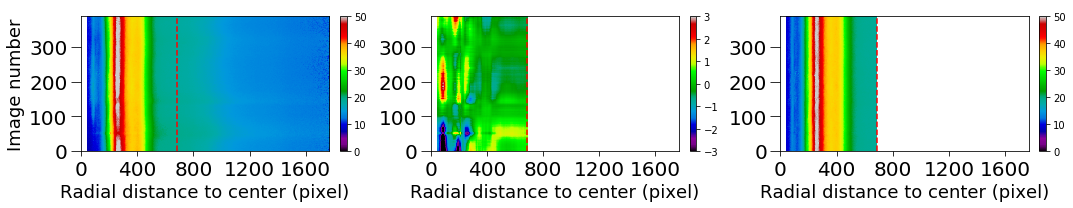

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(masked_s1.T[:,::-1].T,clim=(0,50),cmap=cmap)
plt.gca().set_aspect('auto')
plt.tick_params('y', length=10, which='major')
plt.tick_params('x', length=5, which='major')
# plt.title("Radial intensity profile",fontsize=20)
plt.xlabel("Radial distance to center (pixel)",fontsize=18)
plt.ylabel("Image number",fontsize=18 )
plt.xticks(np.arange(0,1700,400), np.arange(0,1700,400), fontsize=20)
plt.yticks(len(masked_s1)-1-np.array([400,300,200,100,0]),np.array([400,300,200,100,0]),fontsize=20)
plt.ylim(len(masked_s1),0)
plt.axvline(x=687,color="red",linestyle="--")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()

plt.subplot(1,3,2)
plt.imshow(masked_s2.T[:,::-1].T,clim=(-3,3),cmap=cmap)
plt.gca().set_aspect('auto')
plt.tick_params('y', length=10, which='major')
plt.tick_params('x', length=5, which='major')
# plt.title("Three largest PCA components",fontsize=20)
plt.xlabel("Radial distance to center (pixel)",fontsize=18)
plt.xticks(np.arange(0,1700,400), np.arange(0,1700,400), fontsize=20)
plt.yticks(len(masked_s1)-1-np.array([400,300,200,100,0]),np.array([400,300,200,100,0]),fontsize=20)
plt.ylim(len(masked_s1),0)
plt.axvline(x=687,color="red",linestyle="--")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()

plt.subplot(1,3,3)
plt.imshow(masked_s3.T[:,::-1].T,clim=(0,50),cmap=cmap)
plt.gca().set_aspect('auto')
plt.tick_params('y', length=10, which='major')
plt.tick_params('x', length=5, which='major')
# plt.title("After profile variance removal",fontsize=20)
plt.xlabel("Radial distance to center (pixel)",fontsize=18)
plt.xticks(np.arange(0,1700,400), np.arange(0,1700,400), fontsize=20)
plt.yticks(len(masked_s1)-1-np.array([400,300,200,100,0]),np.array([400,300,200,100,0]),fontsize=20)
plt.ylim(len(masked_s1),0)
plt.axvline(x=687,color="red",linestyle="--")
plt.colorbar(fraction=0.046, pad=0.04)

fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_S02_Radial_Profile_Variance_Removal.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_S02_Radial_Profile_Variance_Removal.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()